In [3]:
import json

# 定义展平函数，将主干知识点 -> 分支最小知识点的结构展平为节点和边的形式
def flatten_knowledge_points(knowledge_points, nodes=None, edges=None):
    if nodes is None:
        nodes = []
    if edges is None:
        edges = []

    # 遍历每个主干知识点
    for kp in knowledge_points:
        # 添加主干知识点到节点列表
        nodes.append({
            'id': kp['id'],
            'name': kp['name'],
            'isLeaf': kp['isLeaf'],
            'parent_id': kp['parent_id']
        })

        # 处理主干知识点下的分支知识点（最小知识点）
        if 'children' in kp and kp['children']:
            for child in kp['children']:
                # 添加分支最小知识点到节点列表
                nodes.append({
                    'id': child['id'],
                    'name': child['name'],
                    'isLeaf': child['isLeaf'],
                    'parent_id': kp['id']  # 分支知识点的 parent_id 是它的主干知识点
                })

                # 添加主干与分支之间的边
                edges.append({
                    'source': kp['id'],  # 主干知识点
                    'target': child['id']  # 分支最小知识点
                })

    return nodes, edges

# 从JSON文件中加载知识点数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 展平数据为节点和边
nodes, edges = flatten_knowledge_points(data)

# 打印节点和边
print("节点数据:")
print(json.dumps(nodes, ensure_ascii=False, indent=4))

print("\n边数据:")
print(json.dumps(edges, ensure_ascii=False, indent=4))

# 保存节点和边数据到文件
with open('CPrograming_Knowledge_Node.json', 'w', encoding='utf-8') as f:
    json.dump(nodes, f, ensure_ascii=False, indent=4)

with open('CPrograming_Knowledge_Edges.json', 'w', encoding='utf-8') as f:
    json.dump(edges, f, ensure_ascii=False, indent=4)


节点数据:
[
    {
        "id": "64",
        "name": "基本数据类型与表达式",
        "isLeaf": false,
        "parent_id": "63"
    },
    {
        "id": "65",
        "name": "表达式",
        "isLeaf": true,
        "parent_id": "64"
    },
    {
        "id": "66",
        "name": "输入输出格式化控制",
        "isLeaf": true,
        "parent_id": "64"
    },
    {
        "id": "67",
        "name": "分支控制",
        "isLeaf": false,
        "parent_id": "63"
    },
    {
        "id": "68",
        "name": "if-else",
        "isLeaf": true,
        "parent_id": "67"
    },
    {
        "id": "69",
        "name": "switch",
        "isLeaf": true,
        "parent_id": "67"
    },
    {
        "id": "70",
        "name": "循环控制",
        "isLeaf": false,
        "parent_id": "63"
    },
    {
        "id": "71",
        "name": "for",
        "isLeaf": true,
        "parent_id": "70"
    },
    {
        "id": "72",
        "name": "while和do-while",
        "isLeaf": true,
        "parent_id": "70"
    },
  

### 可视化

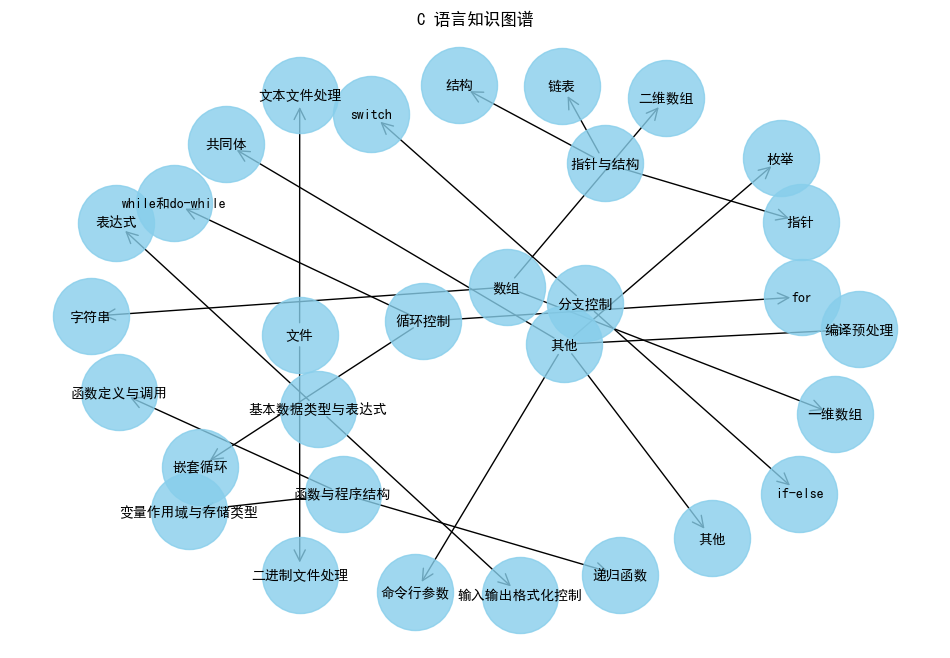

In [7]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置 matplotlib 的字体为 SimHei 或其他支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 从文件中加载节点和边数据
with open('CPrograming_Knowledge_Node.json', 'r', encoding='utf-8') as f:
    nodes = json.load(f)

with open('CPrograming_Knowledge_Edges.json', 'r', encoding='utf-8') as f:
    edges = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 添加节点到图中
for node in nodes:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'])

# 添加边到图中
for edge in edges:
    G.add_edge(edge['source'], edge['target'])

# 定义节点标签
labels = {node['id']: node['name'] for node in nodes}

# 可视化
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # 选择布局方式（这里使用 spring layout）

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=3000, alpha=0.8)
# 绘制边
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='->', arrowsize=20)
# 绘制标签
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# 显示图
plt.title("C 语言知识图谱")  # 设置中文标题
plt.axis('off')  # 不显示坐标轴
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\usr\\share\\fonts\\truetype\\droid\\DroidSansFallbackFull.ttf'

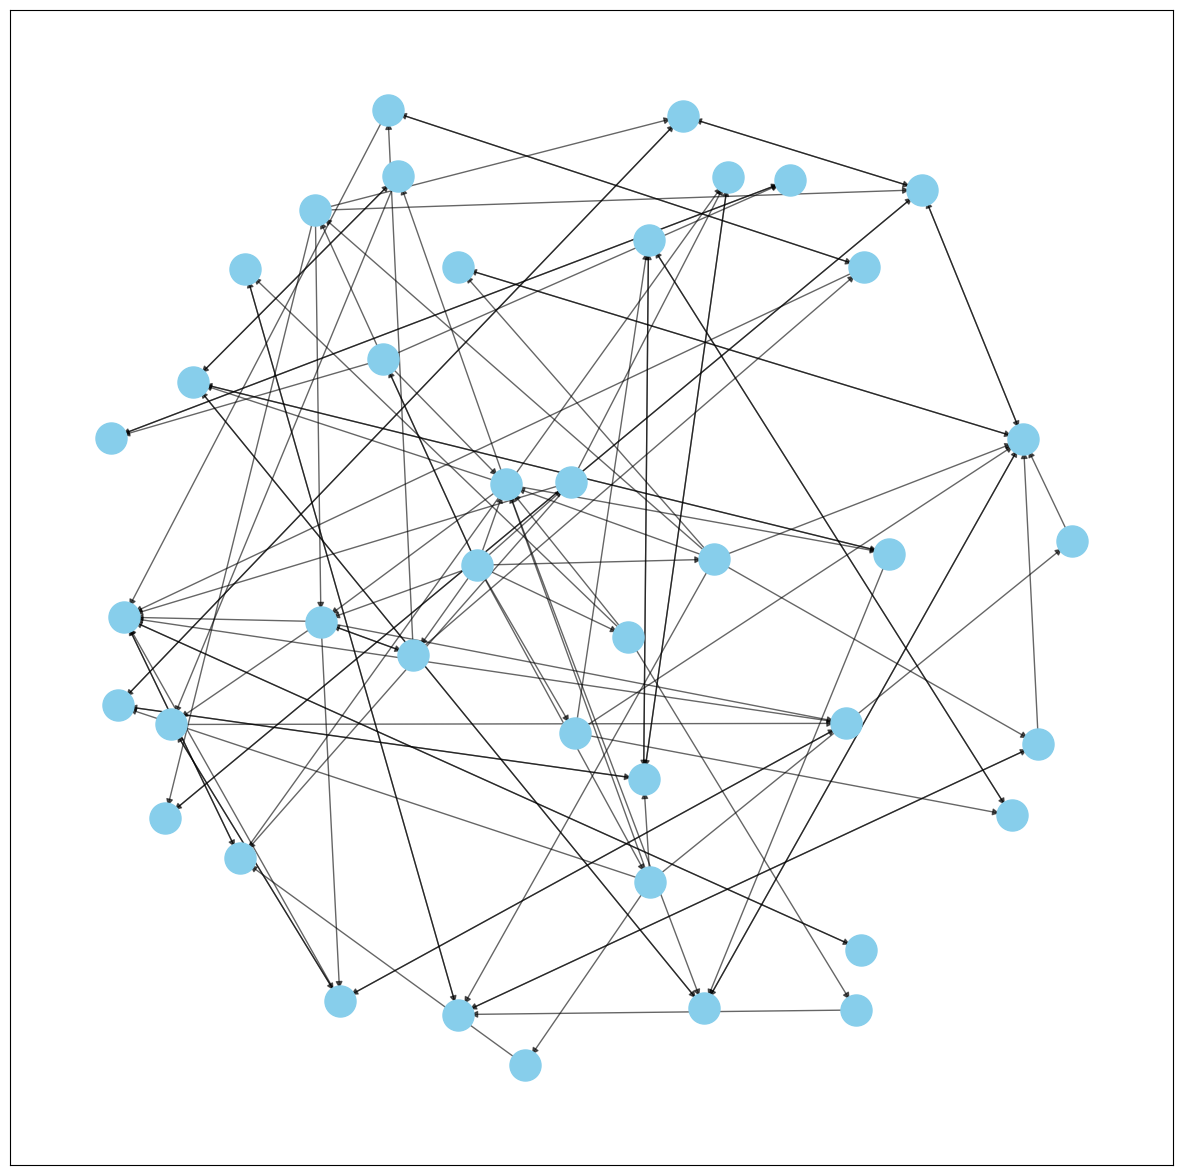

In [8]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the JSON data
with open("CPrograming_KnowledgePointTree_Processed.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# 设置中文字体支持
font = FontProperties(fname='/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf')  # 适配Linux环境字体路径，Windows系统可以换成其他常用中文字体路径

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for node in data:
    G.add_node(node['id'], label=node['name'])

    # 添加子节点关系
    for child_id in node.get('children', []):
        G.add_edge(node['id'], child_id)

    # 添加知识点关系
    for relation in node.get('relations', []):
        G.add_edge(node['id'], relation['target'], weight=relation['weight'], relation=relation['relation'])

# 绘制图形
pos = nx.spring_layout(G, k=1.2, seed=42)  # 使用 spring 布局让图形更均匀
plt.figure(figsize=(15, 15))

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")

# 绘制边
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=1.0, alpha=0.6)

# 绘制节点标签
node_labels = {node: G.nodes[node]['label'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_family=font.get_name())

# 绘制边标签，显示关系和权重
edge_labels = {(u, v): f"{G[u][v]['relation']} ({G[u][v]['weight']})" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_family=font.get_name())

plt.title("C语言知识图谱", fontsize=15, fontproperties=font)
plt.show()


In [9]:
import json
import networkx as nx
from pyvis.network import Network

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系')

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        directed = relation['directed']
        difficulty = relation['difficulty']
        importance = relation['importance']

        # 如果是有向关系
        if directed:
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance)
        else:
            # 无向关系，添加双向边
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance)
            G.add_edge(target, source, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance)

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True)

# 设置物理引擎以更好地呈现图形
net.barnes_hut()

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node['title'] = f"名称: {node['label']}<br>是否叶子节点: {node['isLeaf']}"
    node['label'] = node['label']

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    edge['title'] = f"关系: {edge_info.get('relation')}<br>权重: {edge_info.get('weight')}<br>难度: {edge_info.get('difficulty')}<br>重要性: {edge_info.get('importance')}"
    edge['value'] = edge_info.get('weight')

# 生成HTML文件
net.show('knowledge_graph.html')


knowledge_graph.html


In [10]:
import json
import networkx as nx
from pyvis.network import Network
from matplotlib import cm

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系', color='gray', width=1)

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        directed = relation['directed']
        difficulty = relation['difficulty']
        importance = relation['importance']

        # 根据权重设置边的颜色和宽度
        edge_color = cm.Blues(weight)  # 使用蓝色渐变
        edge_color_hex = '#%02x%02x%02x' % tuple(int(c*255) for c in edge_color[:3])
        edge_width = 1 + weight * 2  # 边的宽度

        # 如果是有向关系
        if directed:
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color_hex, width=edge_width)
        else:
            # 无向关系，添加双向边
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color_hex, width=edge_width)
            G.add_edge(target, source, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color_hex, width=edge_width)

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True, bgcolor='#222222', font_color='white')

# 设置物理引擎以更好地呈现图形
net.force_atlas_2based(gravity=-50, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4)

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node['title'] = f"<b>名称:</b> {node['label']}<br><b>是否叶子节点:</b> {node['isLeaf']}"
    node['label'] = node['label']
    node['shape'] = 'ellipse'
    node['color'] = '#00ccff' if node['isLeaf'] else '#ffcc00'  # 叶子节点和非叶子节点不同颜色
    node['size'] = 15 if node['isLeaf'] else 20  # 叶子节点和非叶子节点不同大小

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    relation = edge_info.get('relation')
    weight = edge_info.get('weight')
    difficulty = edge_info.get('difficulty')
    importance = edge_info.get('importance')
    edge['title'] = f"<b>关系:</b> {relation}<br><b>权重:</b> {weight}<br><b>难度:</b> {difficulty}<br><b>重要性:</b> {importance}"
    edge['value'] = weight
    edge['color'] = edge_info.get('color', 'gray')
    edge['width'] = edge_info.get('width', 1)

# 设置整体布局和样式
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 16
    },
    "borderWidth": 2
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "type": "continuous"
    }
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "navigationButtons": true,
    "tooltipDelay": 100
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08,
      "damping": 0.4,
      "avoidOverlap": 0.5
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")

# 生成HTML文件
net.show('knowledge_graph.html')


knowledge_graph.html


In [11]:
import json
import networkx as nx
from pyvis.network import Network

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系', color='#cccccc', width=0.5)

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        directed = relation['directed']
        difficulty = relation['difficulty']
        importance = relation['importance']

        # 设置边的颜色和宽度，线条更细
        edge_color = '#888888'  # 使用灰色系，简约风格
        edge_width = 0.5  # 边的宽度更细

        # 如果是有向关系
        if directed:
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color, width=edge_width)
        else:
            # 无向关系，添加双向边
            G.add_edge(source, target, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color, width=edge_width)
            G.add_edge(target, source, relation=relation_type, weight=weight,
                       difficulty=difficulty, importance=importance,
                       color=edge_color, width=edge_width)

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True, bgcolor='white', font_color='black')

# 设置物理引擎以更好地呈现图形
net.force_atlas_2based(gravity=-30, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4)

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node_id = node['id']
    node_data = next((item for item in data if item['id'] == node_id), None)
    is_leaf = node_data.get('isLeaf', False)
    children = node_data.get('children', [])
    relations = node_data.get('relations', [])

    # 节点详细信息，显示所有数据
    node['title'] = f"<b>名称:</b> {node['label']}<br><b>是否叶子节点:</b> {is_leaf}<br><b>子节点:</b> {children}<br><b>关系:</b> {relations}"
    node['label'] = node['label']
    node['shape'] = 'box'  # 使用矩形框，简约风格
    node['color'] = '#ffffff'  # 节点背景为白色
    node['borderWidth'] = 1  # 边框宽度更细
    node['borderWidthSelected'] = 2
    node['font'] = {'color': '#000000'}  # 字体颜色为黑色
    node['size'] = 15

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    relation = edge_info.get('relation')
    weight = edge_info.get('weight')
    difficulty = edge_info.get('difficulty')
    importance = edge_info.get('importance')
    edge['title'] = f"<b>关系:</b> {relation}<br><b>权重:</b> {weight}<br><b>难度:</b> {difficulty}<br><b>重要性:</b> {importance}"
    edge['value'] = weight
    edge['color'] = edge_info.get('color', '#888888')
    edge['width'] = 0.5  # 线条更细
    edge['arrows'] = {'to': {'enabled': edge_info.get('directed', True)}}  # 根据是否有向，显示箭头

# 设置整体布局和样式
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 14,
      "color": "#000000"
    },
    "borderWidth": 1,
    "color": {
      "background": "#ffffff",
      "border": "#cccccc",
      "highlight": {
        "background": "#e6f7ff",
        "border": "#1890ff"
      }
    },
    "shape": "box"
  },
  "edges": {
    "color": {
      "color": "#888888",
      "highlight": "#1890ff",
      "inherit": false
    },
    "smooth": {
      "enabled": false
    },
    "width": 0.5
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "navigationButtons": true,
    "tooltipDelay": 100
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -30,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08,
      "damping": 0.4,
      "avoidOverlap": 0.5
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")

# 生成HTML文件
net.show('knowledge_graph.html')


knowledge_graph.html


In [14]:
import json
import networkx as nx
from pyvis.network import Network
from matplotlib import colors, colormaps

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 定义难度和重要性的映射
importance_mapping = {'高': 1, '中等': 0.5, '低': 0}
difficulty_mapping = {'高': 1, '中等': 0.5, '低': 0}

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'], children=node['children'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系', color='#cccccc', width=0.1)

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        is_directed = relation['directed']
        difficulty = difficulty_mapping.get(relation['difficulty'], 0.5)
        importance = importance_mapping.get(relation['importance'], 0.5)

        # 将权重转换为数值（0到1之间）
        weight_value = float(weight)

        # 根据权重设置边的颜色（从红色到绿色渐变）
        cmap = colormaps['RdYlGn']
        edge_color = colors.rgb2hex(cmap(weight_value))

        # 边的宽度更细
        edge_width = 0.1

        # 添加边
        G.add_edge(source, target, relation=relation_type, weight=weight_value,
                   difficulty=difficulty, importance=importance,
                   color=edge_color, width=edge_width, is_directed=is_directed)

# 为每个节点计算重要性（取关联关系中最高的重要性）
for node in G.nodes():
    node_relations = []
    for edge in G.edges(node, data=True):
        edge_data = edge[2]
        node_relations.append(edge_data.get('importance', 0.5))
    if node_relations:
        node_importance = max(node_relations)
    else:
        node_importance = 0.5  # 默认中等重要性
    G.nodes[node]['importance'] = node_importance

    # 根据重要性设置节点颜色（从灰色到黑色渐变）
    node_color_value = 1 - node_importance  # 值越大颜色越浅
    node_color = colors.rgb2hex((node_color_value, node_color_value, node_color_value))
    G.nodes[node]['color'] = node_color

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True, bgcolor='white', font_color='black')

# 设置物理引擎以更好地呈现图形
net.force_atlas_2based(gravity=-30, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4)

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node_id = node['id']
    node_data = G.nodes[node_id]
    is_leaf = node_data.get('isLeaf', False)
    children = node_data.get('children', [])
    importance = node_data.get('importance', 0.5)

    # 节点详细信息，显示所有数据
    node['title'] = f"<b>名称:</b> {node['label']}<br><b>是否叶子节点:</b> {is_leaf}<br><b>子节点:</b> {children}<br><b>重要性:</b> {importance}"
    node['label'] = node['label']
    node['shape'] = 'box'  # 使用矩形框
    node['color'] = node_data.get('color', '#888888')  # 节点颜色根据重要性渐变
    node['borderWidth'] = 0.5  # 边框更细
    node['size'] = 10  # 节点更小

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    relation = edge_info.get('relation')
    weight = edge_info.get('weight')
    difficulty = edge_info.get('difficulty')
    importance = edge_info.get('importance')
    is_directed = edge_info.get('is_directed', True)
    edge['title'] = f"<b>关系:</b> {relation}<br><b>权重:</b> {weight}<br><b>难度:</b> {difficulty}<br><b>重要性:</b> {importance}"
    edge['value'] = weight
    edge['color'] = edge_info.get('color', '#888888')
    edge['width'] = 0.1  # 线条更细
    if is_directed:
        edge['arrows'] = 'to'
    else:
        edge['arrows'] = ''

# 设置整体布局和样式
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12,
      "color": "#000000"
    },
    "borderWidth": 0.5,
    "color": {
      "background": "#ffffff",
      "border": "#cccccc",
      "highlight": {
        "background": "#e6f7ff",
        "border": "#1890ff"
      }
    },
    "shape": "box"
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "enabled": false
    },
    "width": 0.1
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "navigationButtons": true,
    "tooltipDelay": 100
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -30,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08,
      "damping": 0.4,
      "avoidOverlap": 0.5
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")

# 生成HTML文件
net.show('knowledge_graph.html')


knowledge_graph.html


In [15]:
import json
import networkx as nx
from pyvis.network import Network
from matplotlib import colors, colormaps

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 定义难度和重要性的映射
importance_mapping = {'高': 1, '中等': 0.5, '低': 0}
difficulty_mapping = {'高': 1, '中等': 0.5, '低': 0}

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'], children=node['children'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系', color='#dddddd', width=0.1)

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        is_directed = relation['directed']
        difficulty = difficulty_mapping.get(relation['difficulty'], 0.5)
        importance = importance_mapping.get(relation['importance'], 0.5)

        # 将权重转换为数值（0到1之间）
        weight_value = float(weight)

        # 根据权重设置边的颜色（使用浅色渐变）
        cmap = colormaps['Blues_r']
        edge_color = colors.rgb2hex(cmap(weight_value))

        # 边的宽度更细
        edge_width = 0.1

        # 添加边
        G.add_edge(source, target, relation=relation_type, weight=weight_value,
                   difficulty=difficulty, importance=importance,
                   color=edge_color, width=edge_width, is_directed=is_directed)

# 为每个节点计算重要性（取关联关系中最高的重要性）
for node in G.nodes():
    node_relations = []
    for edge in G.edges(node, data=True):
        edge_data = edge[2]
        node_relations.append(edge_data.get('importance', 0.5))
    if node_relations:
        node_importance = max(node_relations)
    else:
        node_importance = 0.5  # 默认中等重要性
    G.nodes[node]['importance'] = node_importance

    # 根据重要性设置节点颜色（使用浅色渐变）
    cmap = colormaps['Greys']
    node_color = colors.rgb2hex(cmap(1 - node_importance))  # 重要性越高，颜色越深
    G.nodes[node]['color'] = node_color

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True, bgcolor='white', font_color='black')

# 设置物理引擎以更好地呈现图形
net.force_atlas_2based(gravity=-30, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4)

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node_id = node['id']
    node_data = G.nodes[node_id]
    is_leaf = node_data.get('isLeaf', False)
    children = node_data.get('children', [])
    importance = node_data.get('importance', 0.5)

    # 节点详细信息，显示所有数据
    node['title'] = f"<b>名称:</b> {node['label']}<br><b>是否叶子节点:</b> {is_leaf}<br><b>子节点:</b> {children}<br><b>重要性:</b> {importance}"
    node['label'] = node['label']
    node['shape'] = 'box'  # 使用矩形框
    node['color'] = node_data.get('color', '#dddddd')  # 节点颜色根据重要性渐变
    node['borderWidth'] = 0.5  # 边框更细
    node['size'] = 10  # 节点更小

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    relation = edge_info.get('relation')
    weight = edge_info.get('weight')
    difficulty = edge_info.get('difficulty')
    importance = edge_info.get('importance')
    is_directed = edge_info.get('is_directed', True)
    edge['title'] = f"<b>关系:</b> {relation}<br><b>权重:</b> {weight}<br><b>难度:</b> {difficulty}<br><b>重要性:</b> {importance}"
    edge['value'] = weight
    edge['color'] = edge_info.get('color', '#dddddd')
    edge['width'] = 0.1  # 线条更细
    if is_directed:
        edge['arrows'] = 'to'
    else:
        edge['arrows'] = ''

# 设置整体布局和样式
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12,
      "color": "#000000"
    },
    "borderWidth": 0.5,
    "color": {
      "background": "#ffffff",
      "border": "#cccccc",
      "highlight": {
        "background": "#e6f7ff",
        "border": "#1890ff"
      }
    },
    "shape": "box"
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "enabled": false
    },
    "width": 0.1
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "navigationButtons": true,
    "tooltipDelay": 100
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -30,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08,
      "damping": 0.4,
      "avoidOverlap": 0.5
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")

# 生成HTML文件
net.show('knowledge_graph_V3.html')


knowledge_graph_V3.html


In [16]:
import json
import networkx as nx
from pyvis.network import Network
from matplotlib import colors, colormaps

# 读取JSON数据
with open('CPrograming_KnowledgePointTree_Processed.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 创建有向图
G = nx.DiGraph()

# 定义难度和重要性的映射
importance_mapping = {'高': 1, '中等': 0.5, '低': 0}
difficulty_mapping = {'高': 1, '中等': 0.5, '低': 0}

# 添加节点
for node in data:
    G.add_node(node['id'], label=node['name'], isLeaf=node['isLeaf'], children=node['children'])

# 添加父子关系的边
for node in data:
    parent_id = node['parent_id']
    if parent_id:
        G.add_edge(parent_id, node['id'], relation='父子关系', color='#dddddd', width=0.1)

    # 添加知识点之间的关系边
    for relation in node['relations']:
        source = node['id']
        target = relation['target']
        relation_type = relation['relation']
        weight = relation['weight']
        is_directed = relation['directed']
        difficulty = difficulty_mapping.get(relation['difficulty'], 0.5)
        importance = importance_mapping.get(relation['importance'], 0.5)

        # 将权重转换为数值（0到1之间）
        weight_value = float(weight)

        # 根据权重设置边的颜色（使用浅色渐变）
        cmap = colormaps['Blues_r']
        edge_color = colors.rgb2hex(cmap(weight_value))

        # 边的宽度更细
        edge_width = 0.1

        # 添加边
        G.add_edge(source, target, relation=relation_type, weight=weight_value,
                   difficulty=difficulty, importance=importance,
                   color=edge_color, width=edge_width, is_directed=is_directed)

# 为每个节点计算重要性（取关联关系中最高的重要性）
for node in G.nodes():
    node_relations = []
    for edge in G.edges(node, data=True):
        edge_data = edge[2]
        node_relations.append(edge_data.get('importance', 0.5))
    if node_relations:
        node_importance = max(node_relations)
    else:
        node_importance = 0.5  # 默认中等重要性
    G.nodes[node]['importance'] = node_importance

    # 根据重要性设置节点颜色（使用浅色渐变）
    cmap = colormaps['Greys']
    node_color = colors.rgb2hex(cmap(1 - node_importance))  # 重要性越高，颜色越深
    G.nodes[node]['color'] = node_color

# 可视化
net = Network(height='800px', width='100%', directed=True, notebook=True, bgcolor='white', font_color='black')

# 设置物理引擎以更好地呈现图形
net.force_atlas_2based(gravity=-30, central_gravity=0.01, spring_length=100, spring_strength=0.08, damping=0.4)

# 从NetworkX图导入数据
net.from_nx(G)

# 调整节点和边的显示
for node in net.nodes:
    node_id = node['id']
    node_data = G.nodes[node_id]
    is_leaf = node_data.get('isLeaf', False)
    children = node_data.get('children', [])
    importance = node_data.get('importance', 0.5)

    # 节点详细信息，显示所有数据
    node['title'] = f"<b>名称:</b> {node['label']}<br><b>是否叶子节点:</b> {is_leaf}<br><b>子节点:</b> {children}<br><b>重要性:</b> {importance}"
    node['label'] = node['label']
    node['shape'] = 'box'  # 使用矩形框
    node['color'] = node_data.get('color', '#dddddd')  # 节点颜色根据重要性渐变
    node['borderWidth'] = 0.5  # 边框更细
    node['size'] = 10  # 节点更小

for edge in net.edges:
    edge_info = G.get_edge_data(edge['from'], edge['to'])
    relation = edge_info.get('relation')
    weight = edge_info.get('weight')
    difficulty = edge_info.get('difficulty')
    importance = edge_info.get('importance')
    is_directed = edge_info.get('is_directed', True)
    edge['title'] = f"<b>关系:</b> {relation}<br><b>权重:</b> {weight}<br><b>难度:</b> {difficulty}<br><b>重要性:</b> {importance}"
    edge['value'] = weight
    edge['color'] = edge_info.get('color', '#dddddd')
    edge['width'] = 0.1  # 线条更细
    if is_directed:
        edge['arrows'] = 'to'
    else:
        edge['arrows'] = ''

# 设置整体布局和样式
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12,
      "color": "#000000"
    },
    "borderWidth": 0.5,
    "color": {
      "background": "#ffffff",
      "border": "#cccccc",
      "highlight": {
        "background": "#e6f7ff",
        "border": "#1890ff"
      }
    },
    "shape": "box"
  },
  "edges": {
    "color": {
      "inherit": false
    },
    "smooth": {
      "enabled": false
    },
    "width": 0.1
  },
  "interaction": {
    "hover": true,
    "multiselect": true,
    "navigationButtons": true,
    "tooltipDelay": 100
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -30,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08,
      "damping": 0.4,
      "avoidOverlap": 0.5
    },
    "minVelocity": 0.75,
    "solver": "forceAtlas2Based"
  }
}
""")

# 生成HTML文件
net.show('knowledge_graph_V4.html')


knowledge_graph_V4.html
